<p align="center">
<img src="https://github.com/datacamp/Market-Basket-Analysis-in-python-live-training/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Market Basket Analysis in Python**

Welcome to this hands-on training event on Market Basket Analysis in Python. In this session, you will learn how to:
* Identify patterns in consumer decision-making with the `mlxtend` package.
* Use metrics to evaluate the properties of patterns.
* Construct "rules" that provide concrete recommendations for businesses.
* Visualize patterns and rules using `seaborn` and `matplotlib`.

## **The dataset**

**We'll use a dataset from a Brazilian ecommerce site (olist.com) that is divided into three CSV files:**

1. `olist_order_items_dataset.csv`
2. `olist_products_dataset.csv`
3. `product_category_name_translation.csv`.

**The column definitions are as follows:**

`olist_order_items_dataset.csv`:

- `order_id`: The unique identifier for a transaction.
- `order_item_id`: The order of an item within a transaction.
- `product_id`: The unique identifier for a product.
- `price`: The product's price.

`olist_products_dataset.csv`:

- `product_id`: The unique identifier for a product.
- `product_category_name`: The name of an item's product category in Portuguese.
- `product_weight_g`: The product's weight in grams.
- `product_length_cm`: The product's length in centimeters.
- `product_width_cm`: The product's width in centimeters.
- `product_height_cm`: The product's height in centimeters.

`product_category_name_translation.csv`:

- `product_category_name`: The name of an item's product category in Portuguese.
- `product_category_name_english`: The name of an item's product category in English.


## **Data preparation**

The first step in any Market Basket Analysis (MBA) project is to determine what constitutes an **item**, an **itemset**, and a **transaction**. This will depend on the dataset we're using and the question we're attempting to answer.

* **Music streaming service**
	* Item: Song
	* Itemset: Collection of unique songs
	* Transaction: User song library
* **Grocery store**
	* Item: Grocery
	* Itemset: Collection of groceries
	* Transaction: Basket of items purchased
* **Ebook store**
	* Item: Ebook
	* Itemset: One or more ebooks
	* Transaction: User ebook library


**In this live training session, we'll use a dataset of transactions from olist.com, a Brazilian ecommerce site.**
* 100,000+ orders over 2016-2018.
* Olist connects sellers to marketplaces.
* Seller can register products with Olist.
* Customer makes purchase at marketplace from Olist store.
* Seller fulfills orders.



---


![alt](https://github.com/datacamp/Market-Basket-Analysis-in-python-live-training/blob/master/assets/olist_marketplaces.png?raw=true)





---



**What is an item**?
  * A product purchased from Olist.

**What is an itemset?**
  * A collection of one or more product(s).

**What is a transaction?**
  * An itemset that corresponds to a customer's order.

In [ ]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Define path to data.
data_path = 'https://github.com/datacamp/Market-Basket-Analysis-in-python-live-training/raw/master/data/'

# Load orders dataset
orders = pd.read_csv(data_path+'olist_order_items_dataset.csv')

# Load products items dataset
products = pd.read_csv(data_path+'olist_products_dataset.csv')

# Load translations dataset
translations = pd.read_csv(data_path+'product_category_name_translation.csv')

In [ ]:
# Preview columns of orders.
orders.head()

,order_id,order_item_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [ ]:
# Preview columns of products.
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [ ]:
# Preview translations.
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


---
<center><h1> Q&A 1</h1> </center>

---

### **Translating item category names**

In [ ]:
# Create dictionary translate product categories names.
translate = dict(zip(translations['product_category_name'], translations['product_category_name_english']))

# Perform translation on products DataFrame.
products['product_category_name_english'] = products['product_category_name'].apply(lambda x: translate.get(x))

# Print English names.
print(products['product_category_name_english'])

0                          perfume
1                              art
2                   sports_leisure
3                             baby
4                       housewares
                   ...            
32946              furniture_decor
32947    construction_tools_lights
32948               bed_bath_table
32949        computers_accessories
32950               bed_bath_table
Name: product_category_name_english, Length: 32951, dtype: object


### **Convert product IDs to product category names.**

In [ ]:
# Create dictionary that maps IDs to product names
idToName = dict(zip(products['product_id'], products['product_category_name_english']))

# Map IDs to product names in orders DataFrame
orders['product_category_name_english'] = orders['product_id'].apply(lambda x: idToName.get(x))

# Drop NaNs.
orders.dropna(inplace=True)

In [ ]:
# Preview the orders DataFrame.
orders.head()

,order_id,order_item_id,product_id,price,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,perfume
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,garden_tools


In [ ]:
# Print number of unique items.
print(len(orders['product_id'].unique()))

32328


In [ ]:
# Print number of unique categories.
print(len(orders['product_category_name_english'].unique()))

71


**Insight**: Performing "aggregation" up to the product category level reduces the number of potential itemsets from $2^{32328}$ to $2^{71}$.

### **Construct transactions from order and product data**

In [ ]:
# Get set of order ids.
order_ids = orders['order_id'].unique().tolist()

# Identify transactions associated with example order.
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']['product_category_name_english']

# Join products together, separating each with a semi-colon.
example1 = ';'.join(example1)

# Print example.
print(example1)

bed_bath_table;furniture_decor


In [ ]:
# Identify transactions associated with example order.
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']['product_category_name_english']

# Join products together, separating each with a semi-colon.
example2 = ';'.join(example2)

# Print example.
print(example2)

watches_gifts;watches_gifts;watches_gifts;watches_gifts


**Insight**: Aggregation reduces the number of items and, therefore, itemsets.

In [ ]:
# Define empty list of transactions.
transactions = []

# Iterate over example list of 10 ids.
for order in order_ids[:10]:
	transactions.append(';'.join(orders[orders['order_id'] == order]['product_category_name_english']))

# Convert to DataFrame.
transactions = pd.DataFrame(transactions, columns = ['transactions'])

# Print preview of transactions.
transactions.head()

,transactions
0,cool_stuff
1,pet_shop
2,furniture_decor
3,perfume
4,garden_tools


**To save time, we'll load the data directly.**

In [ ]:
# Load transaction data.
transactions = pd.read_csv(data_path + 'olist_transactions.csv')

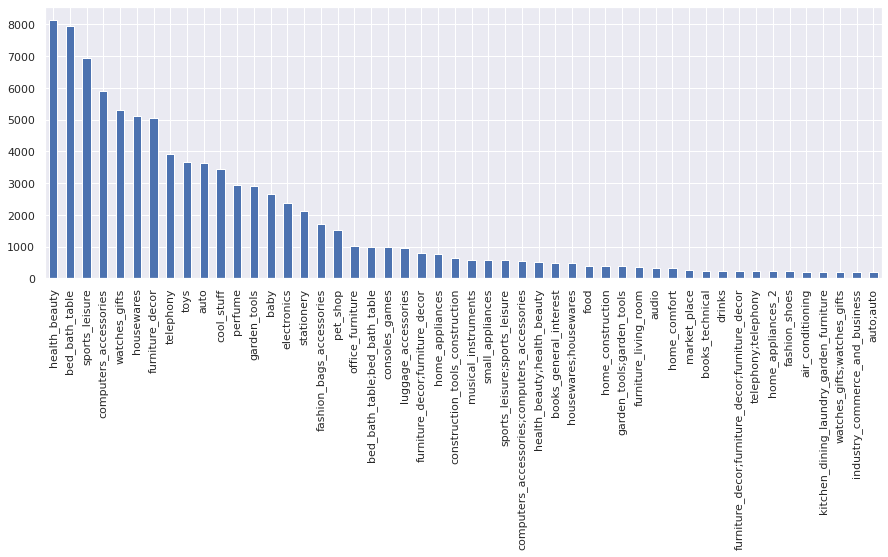

In [ ]:
# Plot 50 largest categories of transactions.
transactions['transactions'].value_counts()[0:50].plot(kind='bar', figsize=(15,5))

**Insight 1:** Most transactions contain items from a single product category.

**Insight 2:** There's a long tail of categories that consist of infrequently purchased items.

In [ ]:
# Convert the DataFrame column to list of lists.
transactions = transactions['transactions'].tolist()

# Convert list items into lists.
transactions = [list(transaction.split(';')) for transaction in transactions]

# Convert to set and then list.
transactions = [list(set(transaction)) for transaction in transactions]

### **Summarize final transaction data**

In [ ]:
# Print length of list.
print('Number of Transactions:', len(transactions))

# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]

# Print median and max length.
print('Median Length:', np.median(counts))

# Print maximum transaction length.
print('Maximum Length:', np.max(counts))

Number of Transactions: 97256
Median Length: 1.0
Maximum Length: 3


## **Association Rules and Metrics**

**Association rule:** an "if-then" relationship between two itemsets.
  * **rule:** if *{coffee)* then *{milk}*.
  * **antecedent:** coffee
  * **consequent:** milk

**Metric:** a measure of the strength of association between two itemsets.
  * **rule:** if *{coffee)* then *{milk}*
  * **support:** 0.10
  * **leverage:** 0.03



### **One-hot encode the transaction data**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)

In [ ]:
# Print DataFrame header.
onehot.head()

,agro_industry_and_commerce,air_conditioning,art,arts_and_crafts,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_music,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,cuisine,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashion_bags_accessories,fashion_childrens_clothes,fashion_female_clothing,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort,home_comfort_2,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfume,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Insight**: Applying one-hot encoding transformed the list of lists (of transactions) into a `DataFrame`. The columns correspond to item categories and the rows correspond to transactions. A true indicates that a transaction contains an item from the corresponding category.


### **Compute the support metric**

$$support(X) = \frac{\text{number of transactions containing X}}{\text{total number of transactions}}$$

In [ ]:
# Print support metric over all rows for each column.
print(onehot.mean(axis=0))

agro_industry_and_commerce      0.001871
air_conditioning                0.002601
art                             0.002077
arts_and_crafts                 0.000236
audio                           0.003599
                                  ...   
tablets_printing_image          0.000812
telephony                       0.043175
toys                            0.039956
watches_gifts                   0.057827
sports_leisure_health_beauty    0.000144
Length: 72, dtype: float64


**Insight:** In retail and ecommerce settings, any particular item is likely to account for a small share of transactions. Here, we've aggregated up to the product category level and very popular categories are still only present in 5% of transactions. Consequently, itemsets with 2 or more item categories will account for a vanishingly small share of total transactions (e.g. 0.01%).

### **Compute the item count distribution over transactions**

In [ ]:
# Print mean of all columns for each row.
print(onehot.sum(axis=1).value_counts())

1    96530
2      711
3       15
dtype: int64


**Insight:** Only 726 transactions contain more than one item category. We may want to consider whether aggregation discards too many multi-item itemsets.

### **Create a column for an itemset with multiple items**

In [ ]:
# Add sports_leisure and health_beauty to DataFrame.
onehot['sports_leisure_health_beauty'] = np.logical_and(onehot['sports_leisure'], onehot['health_beauty'])

# Print support value.
print(onehot['sports_leisure_health_beauty'].mean(axis = 0))

0.00014394998766142962


**Insight:** Only 0.014% of transactions contain a product from both the sports and leisure, and health and beauty categories. These are typically the type of numbers we will work with when we set pruning thresholds in the following section.

### **Aggregate the dataset further by combining product sub-categories**

* **We can use `np.logical_or()` to combine multiple categories.**
  * `np.logical_or(True, True) = True`
  * `np.logical_or(True, False) = True`
  * `np.logical_or(False, True) = True`
  * `np.logical_or(False, False) = False`

In [ ]:
# Merge imported and general interest books.
onehot['books'] = np.logical_or(onehot['books_imported'], onehot['books_general_interest'])

# Merge books and technical books.
onehot['books'] = np.logical_or(onehot['books'], onehot['books_technical'])

# Print support values.
print(onehot[['books','books_imported','books_general_interest','books_technical']].mean(axis=0))

books                     0.008483
books_imported            0.000545
books_general_interest    0.005264
books_technical           0.002673
dtype: float64


### **Compute the confidence metric**

**The support metric doesn't provide information about direction.**
  * $support(antecedent, consequent) = support(consequent, antecedent)$

**The confidence metric has a direction.**
  * Conditional probability of the consequent, given the antecedent.

$$confidence(antecedent \rightarrow consequent)= \frac{support(antecedent, consequent)}{support(antecedent)}$$

In [ ]:
# Compute joint support.
joint_support = np.logical_and(onehot['sports_leisure'], onehot['health_beauty']).mean()

# Compute antecedent support.
antecedent_support = onehot['sports_leisure'].mean()

# Compute confidence.
confidence_metric = joint_support / antecedent_support

# Print confidence metric.
print(confidence_metric)

0.0018134715025906734


In [ ]:
# Define function to compute confidence.
def confidence(antecedent, consequent, data = onehot):
	joint_support = np.logical_and(data[antecedent], data[consequent]).mean()
	antecedent_support = data[antecedent].mean()
	return joint_support / antecedent_support

In [ ]:
# Compute confidence(health_beauty -> sports_leisure)
confidence('health_beauty','sports_leisure')

0.0015844273426889996

**Insight:** $confidence(sports\_leisure \rightarrow health\_beauty)$ was higher than $confidence(health\_beauty \rightarrow sports\_leisure)$. Since the two have the same joint support, the confidence measures will differ only by the antecedent support. The higher confidence metric means that the antecedent has *lower* support.

---
<center><h1> Q&A 2</h1> </center>

---

## **The Apriori Algorithm and Pruning**

**The Apriori algorithm** identifies frequent (high support) itemsets using something called the Apriori principle, which states that a superset that contains an infrequent item is also infrequent.


**Pruning** is the process of removing itemsets or association rules, typically based on the application of a metric threshold. 

![alt](https://github.com/datacamp/Market-Basket-Analysis-in-python-live-training/blob/master/assets/apriori_algorithm.png?raw=True)

**The `mlxtend` module will enable us to apply the Apriori algorithm, perform pruning, and compute association rules.**

### **Applying the Apriori algorithm**

In [ ]:
from mlxtend.frequent_patterns import apriori

# Apply apriori algorithm to data.
frequent_itemsets = apriori(onehot, min_support = 0.01)

# Print frequent itemsets.
print(frequent_itemsets)

     support itemsets
0   0.040070      (5)
1   0.029664      (6)
2   0.096827      (7)
3   0.068777     (15)
4   0.010920     (16)
5   0.037345     (20)
6   0.026219     (27)
7   0.019166     (28)
8   0.066310     (40)
9   0.036173     (43)
10  0.090853     (44)
11  0.060500     (50)
12  0.010632     (53)
13  0.013089     (57)
14  0.032512     (59)
15  0.017582     (60)
16  0.079378     (65)
17  0.023762     (66)
18  0.043175     (68)
19  0.039956     (69)
20  0.057827     (70)


**Observation 1:** `apriori` returns a `DataFrame` with a `support` column and an `itemsets` column.

**Observation 2:** By default `apriori` returns itemset numbers, rather than labels. We can change this by using the `use_colnames` parameter.

**Insight:** All itemsets with a support of greater than 0.01 contain a single item.

In [ ]:
# Apply apriori algorithm to data.
frequent_itemsets = apriori(onehot, min_support = 0.001, use_colnames = True)

# Print frequent itemsets.
print(frequent_itemsets)

     support                                   itemsets
0   0.001871               (agro_industry_and_commerce)
1   0.002601                         (air_conditioning)
2   0.002077                                      (art)
3   0.003599                                    (audio)
4   0.040070                                     (auto)
5   0.029664                                     (baby)
6   0.096827                           (bed_bath_table)
7   0.005264                   (books_general_interest)
8   0.002673                          (books_technical)
9   0.001316                       (christmas_supplies)
10  0.001861                                (computers)
11  0.068777                    (computers_accessories)
12  0.010920                           (consoles_games)
13  0.007691          (construction_tools_construction)
14  0.002509                (construction_tools_lights)
15  0.001717                (construction_tools_safety)
16  0.037345                               (cool

**Insight:** Lowering the support threshold increased the number of itemsets returned and even yielded itemsets with more than one item.

In [ ]:
# Apply apriori algorithm to data.
frequent_itemsets = apriori(onehot, min_support = 0.00005, use_colnames = True)

# Print frequent itemsets.
print(frequent_itemsets)

      support                                           itemsets
0    0.001871                       (agro_industry_and_commerce)
1    0.002601                                 (air_conditioning)
2    0.002077                                              (art)
3    0.000236                                  (arts_and_crafts)
4    0.003599                                            (audio)
..        ...                                                ...
109  0.000051                  (stationery, luggage_accessories)
110  0.000051                    (sports_leisure, watches_gifts)
111  0.000144     (sports_leisure_health_beauty, sports_leisure)
112  0.000062                                 (stationery, toys)
113  0.000144  (health_beauty, sports_leisure_health_beauty, ...

[114 rows x 2 columns]


**Observation:** Notice how low we must set the support threshold (0.005%) to return a high number of itemsets with more than one item.

In [ ]:
# Apply apriori algorithm to data with a two-item limit.
frequent_itemsets = apriori(onehot, min_support = 0.00005, max_len = 2, use_colnames = True)

**Insight:** What do we gain from the apriori algorithm? We start off with $2^{72}$ potential itemsets and immediately reduce it to 106 without enumerating all $2^{72}$ itemsets.

### **Computing association rules from Apriori output**

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Recover association rules using support and a minimum threshold.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)

# Print rules.
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(baby),(bed_bath_table),0.029664,0.096827,0.000175,0.005893,0.060856,-0.002697,0.908527
1,(bed_bath_table),(baby),0.096827,0.029664,0.000175,0.001805,0.060856,-0.002697,0.972091
2,(cool_stuff),(baby),0.037345,0.029664,0.000206,0.005507,0.185633,-0.000902,0.975709
3,(baby),(cool_stuff),0.029664,0.037345,0.000206,0.006932,0.185633,-0.000902,0.969375
4,(baby),(furniture_decor),0.029664,0.066310,0.000123,0.004159,0.062728,-0.001844,0.937590


**Notice that `association_rules` automatically computes seven metrics.**

### **Pruning association rules**

In [ ]:
# Recover association rules using confidence as the metric.
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.01)

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(art),(furniture_decor),0.002077,0.066310,0.000051,0.024752,0.373287,-0.000086,0.957388
1,(audio),(watches_gifts),0.003599,0.057827,0.000062,0.017143,0.296452,-0.000146,0.958606
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881
4,(books_general_interest),(books),0.005264,0.008483,0.005264,1.000000,117.886061,0.005220,inf
5,(books),(books_general_interest),0.008483,0.005264,0.005264,0.620606,117.886061,0.005220,2.621907
6,(books_imported),(books),0.000545,0.008483,0.000545,1.000000,117.886061,0.000540,inf
7,(books),(books_imported),0.008483,0.000545,0.000545,0.064242,117.886061,0.000540,1.068070
8,(books_technical),(books),0.002673,0.008483,0.002673,1.000000,117.886061,0.002651,inf
9,(books),(books_technical),0.008483,0.002673,0.002673,0.315152,117.886061,0.002651,1.456273


In [ ]:
# Select rules with a consequent support above 0.095.
rules = rules[rules['consequent support'] > 0.095]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(furniture_decor),(bed_bath_table),0.066310,0.096827,0.000720,0.010854,0.112101,-0.005701,0.913084
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881


### **The leverage metric**

$$leverage(antecendent, consequent) = support(antecedent, consequent) - support(antecedent) * support(consequent)$$

In [ ]:
# Select rules with leverage higher than 0.0.
rules = rules[rules['leverage'] > 0.0]

# Print rules.
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(home_comfort),(bed_bath_table),0.004082,0.096827,0.000442,0.108312,1.118618,0.000047,1.012881


**Insight:** The Apriori algorithm reduced the number of itemsets from $2^{72}$ to 106. Pruning allowed us to identify to a single association rule that could be useful for cross-promotional purposes: $\{home\_comfort\} \rightarrow \{bed\_bath\_table\}$.

### **Visualizing patterns in metrics**

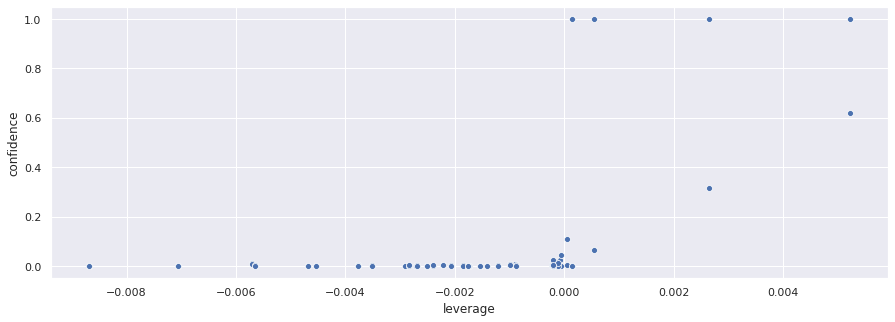

In [ ]:
# Recover association rules with a minimum supporter greater than 0.000001.
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.000001)

# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="leverage", y="confidence", data=rules)

**Insight 1**: leverage and confidence contain some of the same information about the strength of an association.

---
<center><h1> Q&A 3</h1> </center>

---

In [ ]:
# Experiment on your own here.